In [6]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LassoCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import zipfile

import seaborn as sns
sns.set()

#Make sure to pip install monkeylearn first
from textblob import TextBlob
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer 
import string

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /Users/vli/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /Users/vli/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
tweets = pd.read_csv('data/TrumpTweetsCleaned.csv')
#09-11-2017 to 02-16-2018
before = pd.to_datetime('2017-09-11')
after = pd.to_datetime('2018-02-16')
tweets['created_at'] = pd.to_datetime(tweets['created_at'])
# new_tweets = tweets[(tweets['created_at']>=before) and (tweets['created_at']<=after)]

In [8]:
#preprocessing functions for the dataframe
def delete_punct(text):
    '''
    removes special characters from the document
    '''
    no_punct = "".join([c for c in text if c not in string.punctuation])
    return no_punct 
def remove_stopwords(text):
    '''
    removes all stopwords according to the pre-built english dictionary of known stopwords
    '''
    words = [w for w in text if w not in set(stopwords.words('english'))]
    return words
def lemmatize(text):
    '''
    returns the lemmas of each word in the document
    '''
    lemmatized = [lemmatizer.lemmatize(i) for i in text]
    return lemmatized
def joiner(text):
    '''
    joins the comma-separated list into one string
    '''
    joined = " ".join([i for i in text])
    return joined
lemmatizer = WordNetLemmatizer()
tokenizer = TweetTokenizer()

In [9]:
def preproc_pipeline(tweets):
    '''
    The preprocessing pipline applied to each document in the dataframe
    '''
    tweets['text'] = tweets['text'].apply(lambda x: delete_punct(x))
    tweets['text'] = tweets['text'].apply(lambda x: tokenizer.tokenize(x.lower()))
    tweets['text'] = tweets['text'].apply(lambda x: remove_stopwords(x))
    tweets['text'] = tweets['text'].apply(lambda x: lemmatize(x))
    tweets['text'] = tweets['text'].apply(lambda x: joiner(x))
    return tweets

In [10]:
# fitting sk-learn's TF-IDF Vectorizer to our dataframe and returning list of most important keywords
docs = tweets['text'].tolist()
tfidf = TfidfVectorizer(max_features = 2500, min_df = 10, max_df = .8)
X = tfidf.fit_transform(docs).toarray()
feature_names = tfidf.get_feature_names()

In [11]:
def intersection(l1,l2):
    '''
    finding intersection of elements between two lists
    '''
    return list(set(l1) & set(l2))
def term_extract(df):
    '''
    Will return a column of important keywords in each document determined by TF-IDF 
    Sentiment Analysis via Textblob will only be run on these keywords 
    '''
    df['keywords'] = df['text'].apply(lambda x: intersection(x.split(' '), feature_names))
    df['keywords'] = df['keywords'].apply(lambda x: joiner(x))
    return df
tweets = term_extract(tweets)

In [12]:
tweets['polarity'] = [TextBlob(tweets['text'].values[i]).polarity for i in range(len(tweets))]
tweets['subjectivity'] = [TextBlob(tweets['text'].values[i]).subjectivity for i in range(len(tweets))]
tweets

,text,created_at,retweet_count,favorite_count,is_retweet,keywords,polarity,subjectivity
0,Look at the way Crooked Hillary is handling th...,2016-11-01 10:31:00,21459.0,55584.0,False,to case and way she total is the mess at be,-0.262500,0.422917
1,Wow now leading in @ABC /@washingtonpost Poll ...,2016-11-01 11:55:00,16479.0,39631.0,False,to weeks in now mostly before two leading up t...,0.200000,0.533333
2,Crooked Hillary should not be allowed to run f...,2016-11-01 12:01:00,23747.0,59656.0,False,33000 subpoena to getting run be not should de...,0.000000,0.100000
3,JOIN ME TOMORROW IN FLORIDA!MIAMI‚Ä¢12pmhttps:...,2016-11-01 13:35:00,8773.0,17583.0,False,,0.000000,0.000000
4,So terrible that Crooked didn't report she got...,2016-11-01 14:14:00,32713.0,80724.0,False,front terrible it would me been were got the t...,-0.500000,0.550000
5,#ICYMI: Governor @mike_pence and I were in Val...,2016-11-01 17:24:00,7662.0,20695.0,False,it in were and can watch,0.000000,0.000000
6,.@DarrellIssa is a very good man. Help him win...,2016-11-01 18:44:00,10566.0,24122.0,False,congressional him in good his is very seat win,0.855000,0.590000
7,'Kept me out of jail': Top DOJ official involv...,2016-11-01 21:15:00,10856.0,18787.0,False,out of represented in me official probe involv...,0.200000,0.250000
8,Trump promises special session to repeal Obama...,2016-11-01 21:16:00,8479.0,18654.0,False,session to special repeal promises,0.357143,0.571429
9,Hillary Advisers Wanted Her To Avoid Supportin...,2016-11-01 21:20:00,9122.0,15925.0,False,,0.250000,0.250000


In [13]:
# Creating new feature variable - mentions of China in trump tweets
succ = []
for i in range(len(tweets)):
    phrase = tweets['text'].values[i].lower()
    word = 'china'
    if word in phrase:
        succ.append(1)
    else:
        succ.append(0)
tweets['china'] = succ

//anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


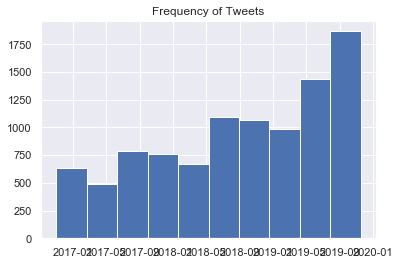

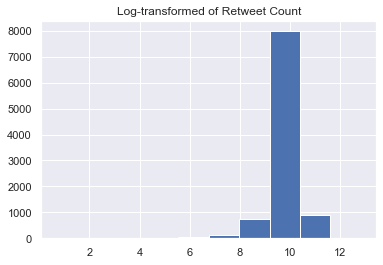

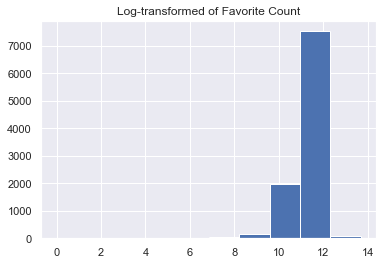

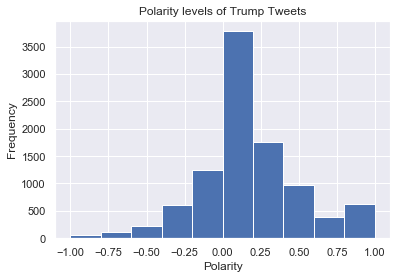

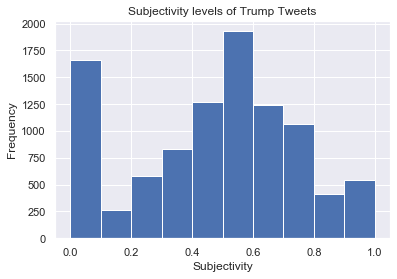

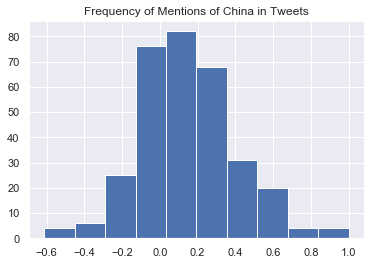

In [14]:
#EDA - copied and pasted from original notebook
temp = plt.hist(tweets['created_at'])
plt.title('Frequency of Tweets')
plt.show()
temp2 = plt.hist(np.log(tweets['retweet_count']))
plt.title('Log-transformed of Retweet Count')
plt.show()
temp3 = plt.hist(np.log(tweets['favorite_count'] + 1))
plt.title('Log-transformed of Favorite Count')
plt.show()
plt.hist(tweets['polarity'])
plt.title('Polarity levels of Trump Tweets')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()
plt.hist(tweets['subjectivity'])
plt.title('Subjectivity levels of Trump Tweets')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()

plt.hist(tweets[tweets['china']==1]['polarity'])
plt.title('Frequency of Mentions of China in Tweets')
plt.show()

In [45]:
tweets

,text,created_at,retweet_count,favorite_count,is_retweet,keywords,polarity,subjectivity,china
0,Look at the way Crooked Hillary is handling th...,2016-11-01 10:31:00,21459.0,55584.0,False,to case and way she total is the mess at be,-0.262500,0.422917,0
1,Wow now leading in @ABC /@washingtonpost Poll ...,2016-11-01 11:55:00,16479.0,39631.0,False,to weeks in now mostly before two leading up t...,0.200000,0.533333,0
2,Crooked Hillary should not be allowed to run f...,2016-11-01 12:01:00,23747.0,59656.0,False,33000 subpoena to getting run be not should de...,0.000000,0.100000,0
3,JOIN ME TOMORROW IN FLORIDA!MIAMI‚Ä¢12pmhttps:...,2016-11-01 13:35:00,8773.0,17583.0,False,,0.000000,0.000000,0
4,So terrible that Crooked didn't report she got...,2016-11-01 14:14:00,32713.0,80724.0,False,front terrible it would me been were got the t...,-0.500000,0.550000,0
5,#ICYMI: Governor @mike_pence and I were in Val...,2016-11-01 17:24:00,7662.0,20695.0,False,it in were and can watch,0.000000,0.000000,0
6,.@DarrellIssa is a very good man. Help him win...,2016-11-01 18:44:00,10566.0,24122.0,False,congressional him in good his is very seat win,0.855000,0.590000,0
7,'Kept me out of jail': Top DOJ official involv...,2016-11-01 21:15:00,10856.0,18787.0,False,out of represented in me official probe involv...,0.200000,0.250000,0
8,Trump promises special session to repeal Obama...,2016-11-01 21:16:00,8479.0,18654.0,False,session to special repeal promises,0.357143,0.571429,0
9,Hillary Advisers Wanted Her To Avoid Supportin...,2016-11-01 21:20:00,9122.0,15925.0,False,,0.250000,0.250000,0
